In [2]:
import matplotlib.pyplot as plt 
import numpy as np 
from scipy import signal
from scipy import linalg
import matplotlib.patches as ppt
import pandas as pd

import sys 
path = '../src/'
if path not in sys.path:
    sys.path.insert(1,path)
from utils_OB import *
from preposessing import *

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes 
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import seaborn as sns

sns.set_theme(context='paper', style='ticks',color_codes='deep')



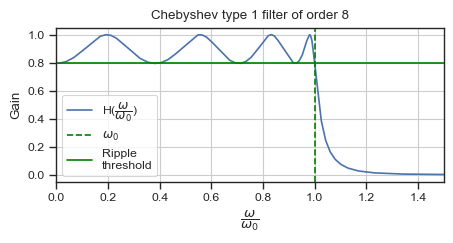

In [2]:
nyquist=1
ripple=1/10**(2/20)
b, a = signal.cheby1(8, 2, nyquist, 'low', analog=True)
w, h = signal.freqs(b, a,worN=5000)

plt.figure(figsize=(5,2))
# plt.plot(w,np.abs(h),label=r' $\dfraq{\omega}{\omega_0}$')
plt.plot(w,np.abs(h),label=r'H($\dfrac{\omega}{\omega_0}$)')

plt.xlim(0,1.50)
plt.axvline(nyquist,label='$\omega_0$',color='green',linestyle='--')
plt.axhline(ripple,label='Ripple\nthreshold',color='green')
plt.legend()
plt.xlabel(r'$\dfrac{\omega}{\omega_0}$')
plt.ylabel('Gain')
plt.title('Chebyshev type 1 filter of order 8')
plt.grid()
H=np.fft.fft(h)
# print(H)
# plt.plot(np.linspace(0,1,len(H)),H)

plt.savefig('Chebyshev_1.jpg',dpi=500)
plt.show()

# plt.semilogx(w, 20 * np.log10(abs(h)))
# plt.ylim(-10,0)
# # plt.semilogx(w, 20 * (abs(h)))
# plt.title('Chebyshev Type I frequency response (rp=5)')
# plt.xlabel('Frequency [radians / second]')
# plt.ylabel('Amplitude [dB]')
# plt.margins(0, 0.1)
# plt.grid(which='both', axis='both')
# plt.axvline(100, color='green') # cutoff frequency
# plt.axhline(-5, color='green') # rp
# plt.show()

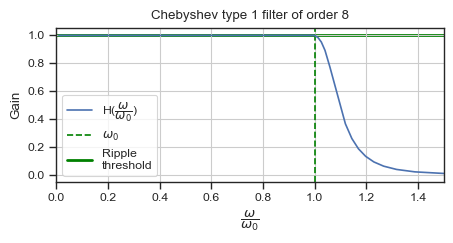

In [3]:
nyquist=1
ripple=1/10**(0.05/20)
b, a = signal.cheby1(8, 0.05, nyquist, 'low', analog=True)
w, h = signal.freqs(b, a,worN=5000)

plt.figure(figsize=(5,2))
# plt.plot(w,np.abs(h),label=r' $\dfraq{\omega}{\omega_0}$')
plt.plot(w,np.abs(h),label=r'H($\dfrac{\omega}{\omega_0}$)')

plt.xlim(0,1.50)
plt.axvline(nyquist,label='$\omega_0$',color='green',linestyle='--',zorder=1)
plt.axhline(ripple,label='Ripple\nthreshold',linewidth=2,color='green',zorder=-1)
plt.legend()
plt.xlabel(r'$\dfrac{\omega}{\omega_0}$')
plt.ylabel('Gain')
plt.title('Chebyshev type 1 filter of order 8')
plt.grid()
H=np.fft.fft(h)
# print(H)
# plt.plot(np.linspace(0,1,len(H)),H)

plt.savefig('Chebyshev_1_actauk.jpg',dpi=500)
plt.show()

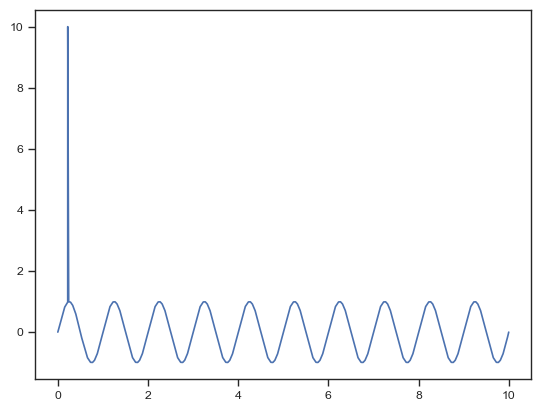

(0.0, 1.0)

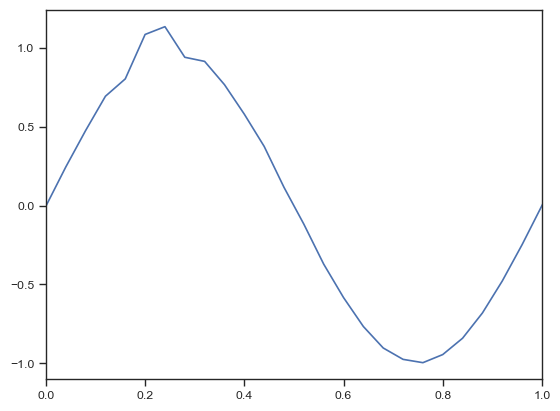

In [4]:
t=np.linspace(0,10,10000)
sin=np.sin(t*2*np.pi)
sin[220]=10
plt.plot(t,sin)
plt.show()
sin_2=signal.decimate(sin,40)
# sin_2=signal.detrend(sin_2)
plt.plot(t[::40],sin_2)

plt.xlim(0,1)

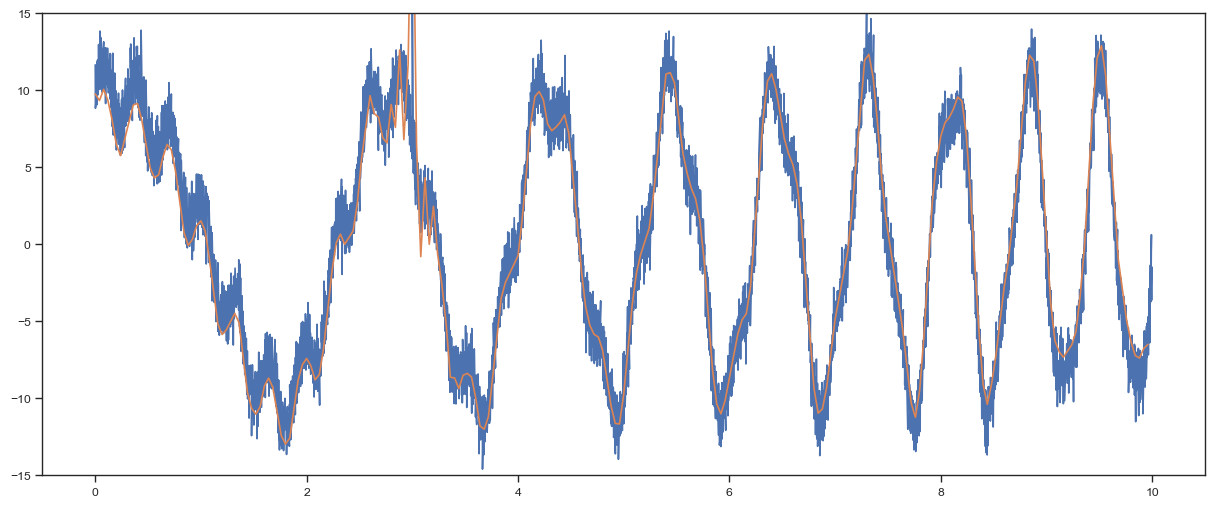

In [5]:
series=load_series(t)
series.create_load(1,'decreasing',10,1,10)
series.F[3000]=1000
series.F+=np.sin(t*20)*2

plt.figure(figsize=(15,6))
plt.ylim(-15,15)
plt.plot(t,series.F)
# plt.show()

sig=signal.detrend(series.F)
order=40
sig=signal.decimate(sig,order)
# plt.figure(figsize=(15,6))
plt.plot(t[::order],sig)
plt.show()

### Actual bridge data: 

In [3]:
file=import_file(folder_path='../test_data_hardanger/',file_name='HB141M-2013-12-06_17-51-55.mat')


In [4]:
raw_data=file.get_raw_data()
# print(raw_data.keys())
sensor_data=raw_data['H4 East']
H5E_x=sensor_data[1]

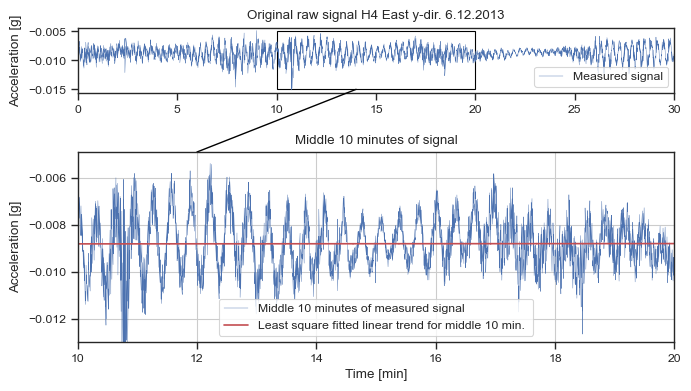

In [33]:
lwm=1

fig=plt.figure(figsize=(7,4))
n=len(H5E_x)
time=np.linspace(0,30,len(H5E_x))
ax1=plt.subplot2grid((3,1),loc=(0,0),rowspan=1,colspan=1,fig=fig)
ax1.plot(time,H5E_x,linewidth=0.3,label='Measured signal')
ax1.set_xlim(0,30)
ax1.legend(loc='lower right')
ax1.set_title('Original raw signal H4 East y-dir. 6.12.2013')
ax1.set_ylabel('Acceleration [g]')
# ax1.axvline(time[n//3],color='black',linewidth=lwm)
# ax1.axvline(time[2*n//3],color='black',linewidth=lwm)

detrended=signal.detrend(H5E_x[n//3:2*n//3])
lstq=H5E_x[n//3:2*n//3]-detrended

ax2=plt.subplot2grid((3,1),loc=(1,0),rowspan=2,colspan=1,fig=fig)
n=len(H5E_x)
ax2.plot(time[n//3:2*n//3],H5E_x[n//3:2*n//3],linewidth=0.3,label='Middle 10 minutes of measured signal')
ax2.set_xlim(time[n//3],time[2*n//3])
ax2.grid()
ax2.set_ylabel('Acceleration [g]')
ax2.set_xlabel('Time [min]')
time2=np.linspace(10,20,len(detrended))
ax2.plot(time2,lstq,color='r',label='Least square fitted linear trend for middle 10 min. ')
ax2.legend(loc='lower center')
ax2.set_title('Middle 10 minutes of signal')
ax2.set_ylim(-0.013)

patch=ppt.Rectangle((time[n//3],-0.015),time[n//3],0.010,fill=False,ec='black')
ax1.add_patch(patch)



xyA=[14,-0.015]
xyB=[12,ax2.get_ylim()[1]]
con = ppt.ConnectionPatch(xyA=xyA, xyB=xyB, coordsA="data", coordsB="data",
                      axesA=ax1, axesB=ax2, color="black",linewidth=lwm)
ax2.add_artist(con)

# xyA=[time[2*n//3],ax1.get_ylim()[0]]
# xyB=[time[2*n//3],ax1.get_ylim()[1]]
# con = ppt.ConnectionPatch(xyA=xyA, xyB=xyB, coordsA="data", coordsB="data",
#                       axesA=ax1, axesB=ax2, color="black",linewidth=lwm)
# ax2.add_artist(con)
plt.tight_layout()
plt.savefig(fname='data_accusation.png',dpi=500,bbox_inches='tight')
plt.show()






In [6]:

std=np.std(detrended)
# print('std: ',time.time()-t0)
interpolated=np.where(np.abs(detrended) > 5*std,np.nan,detrended)
# print('nans: ',time.time()-t0)
interpolated=pd.Series(detrended).interpolate()

In [7]:
#filter:
n=8
q=10
result_type = np.float64
sos1 = signal.cheby1(n, 0.05, 0.8 / q, output='sos')
sos1 = np.asarray(sos1, dtype=result_type)



n=8
q=4
sos2 = signal.cheby1(n, 0.05, 0.8 / q, output='sos')
sos2 = np.asarray(sos2, dtype=result_type)

filtered_1 = signal.sosfiltfilt(sos1, interpolated)
filtered_2 = signal.sosfiltfilt(sos2, filtered_1)

7440 13640
68200 69233
68944 69150


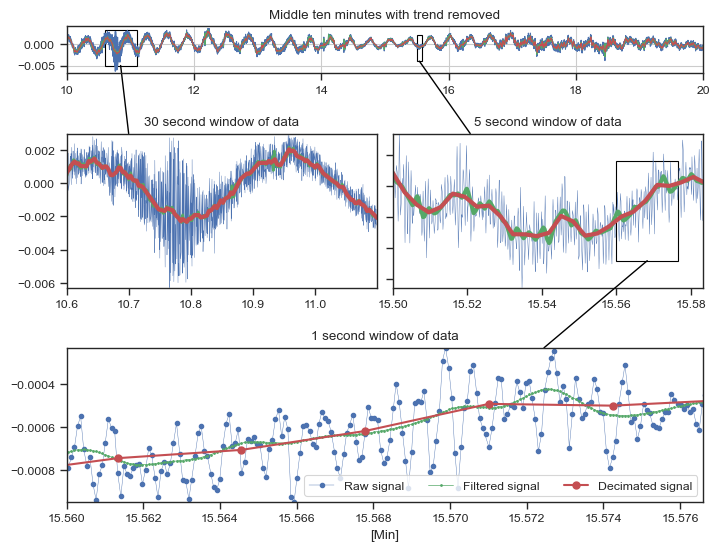

In [35]:



decimated=signal.decimate(interpolated,10)
decimated=signal.decimate(decimated,4)


fig2=plt.figure(figsize=(7,6))

ax3=plt.subplot2grid((6,1),loc=(0,0),rowspan=1,colspan=1,fig=fig2)
ax3.grid()
ax3.set_xlim(10,20)
ax3.set_title('Middle ten minutes with trend removed')
# ax3.plot([time[0],time[-1]],[detrended[0],])

ax3.plot(time2,detrended,linewidth=0.8)
ax3.plot(time2,filtered_2,linewidth=0.8,color='g')
ax3.plot(time2[::40],decimated,linewidth=0.8,color='r')


dt=0.16666*3
t1=10.6
t2=t1+dt
ix1=np.where(time2>t1)[0][0]
ix2=np.where(time2>t2)[0][0]
print(ix1,ix2)
ax4=plt.subplot2grid((6,2),loc=(1,0),rowspan=2,colspan=1,fig=fig2)
ax4.plot(time2,detrended,linewidth=0.3)
ax4.plot(time2,filtered_2,linewidth=2,color='g')
ax4.plot(time2[::40],decimated,linewidth=3,color='r')
ax4.set_xlim(t1,t2)
ax4.set_title('30 second window of data')
ax4.set_ylim(min(detrended[ix1:ix2]),max(detrended[ix1:ix2]))
patch=ppt.Rectangle((t1,-0.005),dt,0.008,fill=False,ec='black')
ax3.add_patch(patch)
xyA=[t1+dt/2,-0.005]
xyB=[t1+dt/5,ax4.get_ylim()[1]]
con = ppt.ConnectionPatch(xyA=xyA, xyB=xyB, coordsA="data", coordsB="data",
                      axesA=ax3, axesB=ax4, color="black",linewidth=lwm)
ax3.add_artist(con)


dt2=0.01666*5
t3=15.5
t4=t3+dt2
ix3=np.where(time2>t3)[0][0]
ix4=np.where(time2>t4)[0][0]
print(ix3,ix4)
ax5=plt.subplot2grid((6,2),loc=(1,1),rowspan=2,colspan=1,fig=fig2)
ax5.plot(time2,detrended,linewidth=0.3)
ax5.plot(time2,filtered_2,linewidth=3,color='g')
ax5.plot(time2[::40],decimated,linewidth=3,color='r')
ax5.set_xlim(t3,t4)
ax5.set_title('5 second window of data')
ax5.set_ylim(min(detrended[ix3:ix4]),max(detrended[ix3:ix4]))
ax5.set_yticklabels([])
patch=ppt.Rectangle((t3,-0.004),dt2,0.006,fill=False,ec='black')
ax3.add_patch(patch)
xyA=[t3+dt2/2,-0.004]
xyB=[t3+dt2/4,ax5.get_ylim()[1]]
con = ppt.ConnectionPatch(xyA=xyA, xyB=xyB, coordsA="data", coordsB="data",
                      axesA=ax3, axesB=ax5, color="black",linewidth=lwm)
ax5.add_artist(con)


dt3=0.0166
t6=15.56
t7=t6+dt3
ix5=np.where(time2>t6)[0][0]
ix6=np.where(time2>t7)[0][0]
print(ix5,ix6)
ax6=plt.subplot2grid((6,2),loc=(3,0),rowspan=2,colspan=2,fig=fig2)
ax6.plot(time2,detrended,linewidth=0.3,marker='o',
         markersize=3,label='Raw signal')
ax6.plot(time2,filtered_2,linewidth=0.5,color='g',
         marker='o',markersize=1,label='Filtered signal')
ax6.plot(time2[::40],decimated,linewidth=1.5,color='r',
         marker='o',markersize=5,label='Decimated signal')
ax6.set_xlim(t6,t7)
ax6.set_title('1 second window of data')
ax6.set_ylim(min(detrended[ix5:ix6]),max(detrended[ix5:ix6]))
ax6.set_xlabel('[Min]')
patch=ppt.Rectangle((t6,-0.0011),dt3,0.0008,fill=False,ec='black')
ax5.add_patch(patch)
xyA=[t6+dt3/2,-0.0011]
xyB=[t6+3*dt3/4,ax6.get_ylim()[1]]
con = ppt.ConnectionPatch(xyA=xyA, xyB=xyB, coordsA="data", coordsB="data",
                      axesA=ax5, axesB=ax6, color="black",linewidth=lwm)
ax6.add_artist(con)
plt.tight_layout(pad=0)
plt.legend(ncols=3,loc='lower right')
plt.savefig(fname='data_inspection.png',dpi=500,bbox_inches='tight')
plt.show()


<built-in function len>
[ 0.01238161  0.94667992  0.51829823 -0.68769236 -0.86846559  0.2177668
  0.98786336  0.30739358 -0.82505572 -0.74482977  0.42606088  0.97414462
  0.09043107 -0.9241229  -0.58396596  0.61420439  0.9103514  -0.12907817
 -0.97923265 -0.39236053  0.77040911  0.80244154 -0.34294904 -0.98521822
 -0.18153142  0.88844507  0.65469949 -0.53987834 -0.94214736  0.03818021
  0.96248056  0.47433532 -0.70991052 -0.85234576  0.25603699  0.98868903
  0.27042575 -0.84468877 -0.72021344  0.46118223  0.96578724  0.05309355
 -0.93752543 -0.55229796  0.64340443  0.89494388 -0.16690812 -0.98375843
 -0.35700119  0.79372547  0.77959959 -0.37857676 -0.98115335 -0.14399305
  0.9047059   0.62537189 -0.57117162 -0.93021691  0.07670044  0.97009181
  0.44084079 -0.73617882 -0.83239346  0.29315992  0.98723225  0.2352503
 -0.86654285 -0.689908    0.49007876  0.96201843  0.00983817 -0.945019
 -0.52192153  0.67352857  0.89149164 -0.22968244 -0.92948272]


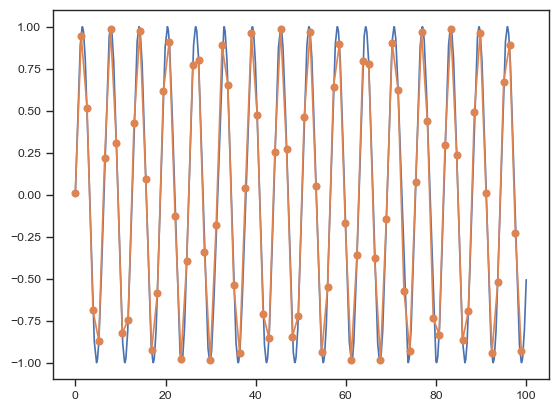

In [9]:
t=np.linspace(0,100,1000)
x=np.sin(t)
axis=0
q=13

sl = [slice(None)] * x.ndim
y = signal.sosfiltfilt(sos1, x, axis=axis)
sl[axis] = slice(None, None, q)

print(len)
Y=y[tuple(sl)]
print(Y)
plt.plot(t,x)
plt.plot(t[::q],Y,marker='o')